# 単回帰分析(最高気温からコーヒーの売り上げを予測)

In [3]:
import pandas as pd
df=pd.read_excel('n_coffee+vs+temp.xlsx')

In [4]:
df.head()

,MAX_TEMP,N_COFFEE
0,27,167
1,17,80
2,21,98
3,30,167
4,28,124


In [5]:
import numpy as np
X=np.array(df.loc[:,['MAX_TEMP']])

In [6]:
y=df.N_COFFEE.values

In [7]:
type(y)

numpy.ndarray

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [10]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

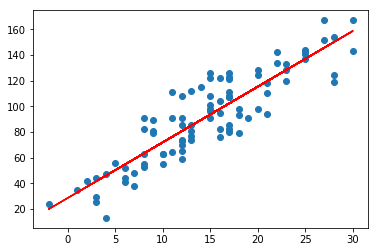

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_train,y_train,marker="o")
plt.plot(X_train,lr.predict(X_train),color='r')
plt.show()

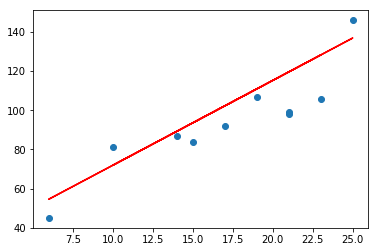

In [14]:
plt.scatter(X_test,y_test,marker="o")
plt.plot(X_test,lr.predict(X_test),color='r')
plt.show()

# 重回帰分析(bostonデータセット)

In [16]:
from sklearn.datasets import load_boston
boston=load_boston()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [18]:
X_df=pd.DataFrame(boston.data,columns=boston.feature_names)
y_df=pd.DataFrame(boston.target,columns=['MEDV'])

In [19]:
X_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [21]:
y_df.head(3)

,MEDV
0,24.0
1,21.6
2,34.7


In [22]:
data_df=pd.concat((X_df,y_df),axis=1)

In [23]:
data_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [26]:
df_pickup=data_df.loc[:,['LSTAT',"RM",'AGE','DIS']]

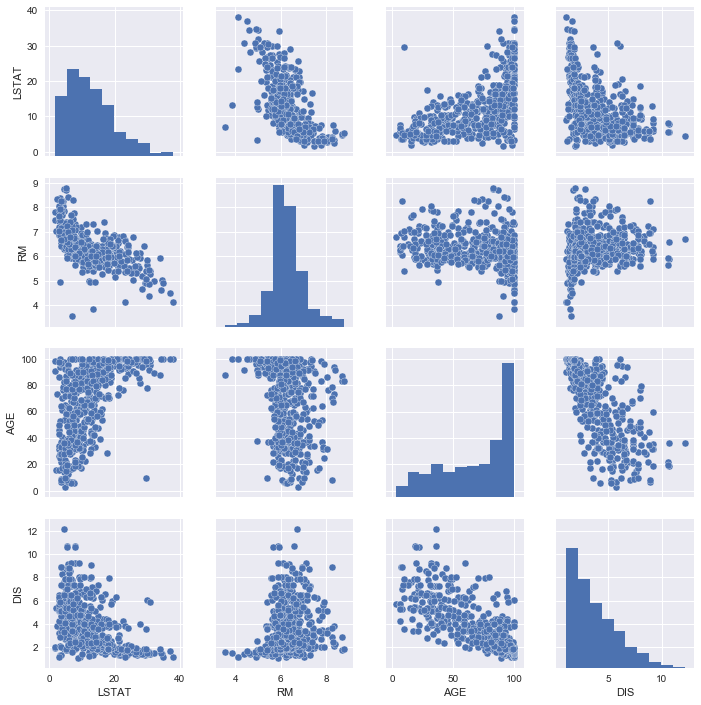

In [28]:
import seaborn as sns
sns.pairplot(df_pickup)
plt.show()

### df.corr()で相関行列を表示できる---線形な関係の強さ

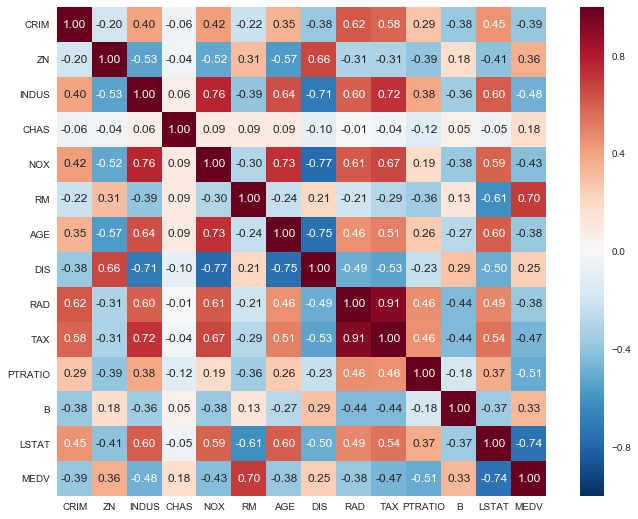

In [31]:
plt.figure(figsize=(12,9))
sns.heatmap(data_df.corr(),annot=True,square=True,fmt='.2f')
plt.show()

In [41]:
X_bst=data_df.loc[:,['RM','LSTAT']].values
y_bst=data_df.MEDV.values

In [42]:
Xbst_train,Xbst_test,ybst_train,ybst_test=train_test_split(X_bst,y_bst,test_size=0.3,random_state=0)

In [43]:
from sklearn.linear_model import LinearRegression
lr_bos=LinearRegression()

In [44]:
lr_bos.fit(Xbst_train,ybst_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
lr_bos.coef_

array([ 5.27350522, -0.6418309 ])

In [46]:
#score関数により決定係数を出し、性能評価
print('train:%.3f'%lr_bos.score(Xbst_train,ybst_train))
print('train:%.3f'%lr_bos.score(Xbst_test,ybst_test))

train:0.651
train:0.607


### 決定係数とはなんなのか
yのバラツキのうち回帰平面に平行な成分の割合。平行ということはデータの性質のうちその回帰平面で表せる要素である。<br>
ということは決定係数が大きいほど回帰平面がデータの性質をその含んでいるということになる。

In [47]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [48]:
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.791940
test : 0.586502


In [53]:
#平均二乗誤差の計算RMSEroot mean square error
from sklearn.metrics import mean_squared_error as mse
print('train:%.3f'%(mse(lr_bos.predict(Xbst_train),ybst_train)**(1/2)))
print('test:%.3f'%(mse(lr_bos.predict(Xbst_test),ybst_test))**(1/2))

train:5.439
test:5.721


## 残差= y(予測) - y(データ)

## 標準化ありの場合

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std = scaler.fit_transform(boston.data) # すべての説明変数を変換
y_std=scaler.fit_transform(boston.target) # reshape(1,-1)すると出力がおかしくなる。flattenみたいになるので

/Users/zukako/.pyenv/versions/anaconda3-4.0.0/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/zukako/.pyenv/versions/anaconda3-4.0.0/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [72]:
# 標準化したデータで線形モデルを学習させる
lr_std = LinearRegression()
lr_std.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
lr_std.coef_

array([-0.10017523,  0.1176512 ,  0.01556018,  0.0742493 , -0.22421527,
        0.29066587,  0.00229872, -0.3378803 ,  0.28937562, -0.22593552,
       -0.22443985,  0.09323458, -0.40799686])

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std = scaler.fit_transform(boston.data.reshape(1,-1)) # すべての説明変数を変換
y_std=scaler.fit_transform(boston.target.reshape(1,-1)) # reshape(1,-1)すると出力がおかしくなる。
# 標準化したデータで線形モデルを学習させる
lr_std = LinearRegression()
lr_std.fit(X_std, y_std)
lr_std.coef_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [63]:
boston.data.reshape(1,-1)

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [66]:
boston.data.flatten()

array([  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
         2.10000000e+01,   3.96900000e+02,   7.88000000e+00])